## Project Title : Extraction/identification of major topics & themes discussed in news articles.

### Problem Description
### In this project your task is to identify major themes/topics across a collection of BBC news articles. You can use clustering algorithms such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) etc.

### Data Description
### The dataset contains a set of news articles for each major segment consisting of business, entertainment, politics, sports and technology. You need to create an aggregate dataset of all the news articles and perform topic modeling on this dataset. Verify whether these topics correspond to the different tags available.

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.metrics import accuracy_score, classification_report
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
# import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
data = pd.read_csv('bbc.csv')

### First Look of Data

In [3]:
data.head()

,Unnamed: 0,news,type
0,0,Ad sales boost Time Warner profit\n \n Quarter...,business
1,1,Dollar gains on Greenspan speech\n \n The doll...,business
2,2,Yukos unit buyer faces loan claim\n \n The own...,business
3,3,High fuel prices hit BA's profits\n \n British...,business
4,4,Pernod takeover talk lifts Domecq\n \n Shares ...,business


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2225 non-null   int64 
 1   news        2225 non-null   object
 2   type        2225 non-null   object
dtypes: int64(1), object(2)
memory usage: 52.3+ KB


In [5]:
data.shape

(2225, 3)

C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type', ylabel='count'>

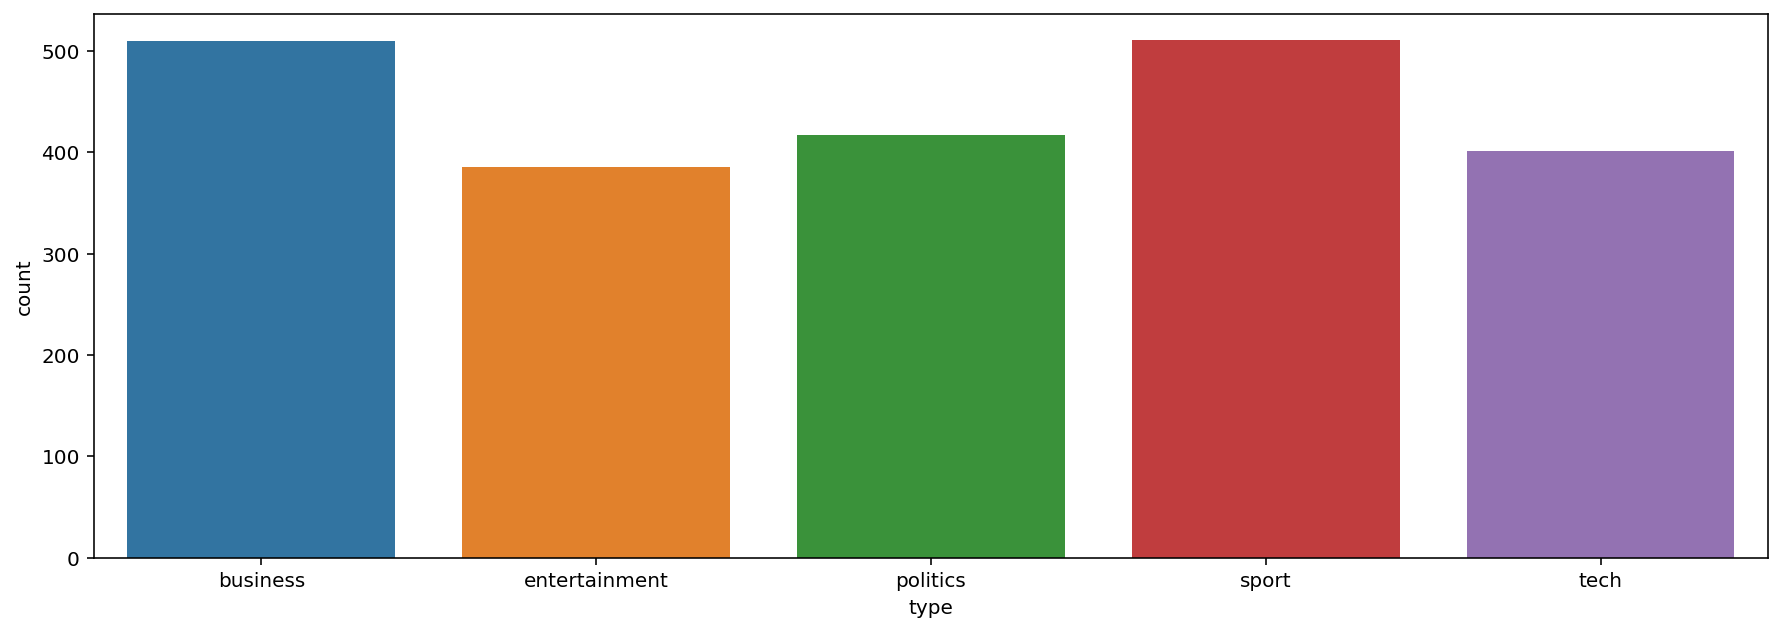

In [40]:
plt.figure(figsize=(15, 5))
sns.countplot(data.type)

In [7]:
data['News_length'] = data['news'].str.len()
print(data['News_length'])

0        2570
1        2258
2        1558
3        2422
4        1576
        ...  
2220     2527
2221     2295
2222     6298
2223     2324
2224    16249
Name: News_length, Length: 2225, dtype: int64


In [8]:
data.head()

,Unnamed: 0,news,type,News_length
0,0,Ad sales boost Time Warner profit\n \n Quarter...,business,2570
1,1,Dollar gains on Greenspan speech\n \n The doll...,business,2258
2,2,Yukos unit buyer faces loan claim\n \n The own...,business,1558
3,3,High fuel prices hit BA's profits\n \n British...,business,2422
4,4,Pernod takeover talk lifts Domecq\n \n Shares ...,business,1576


C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


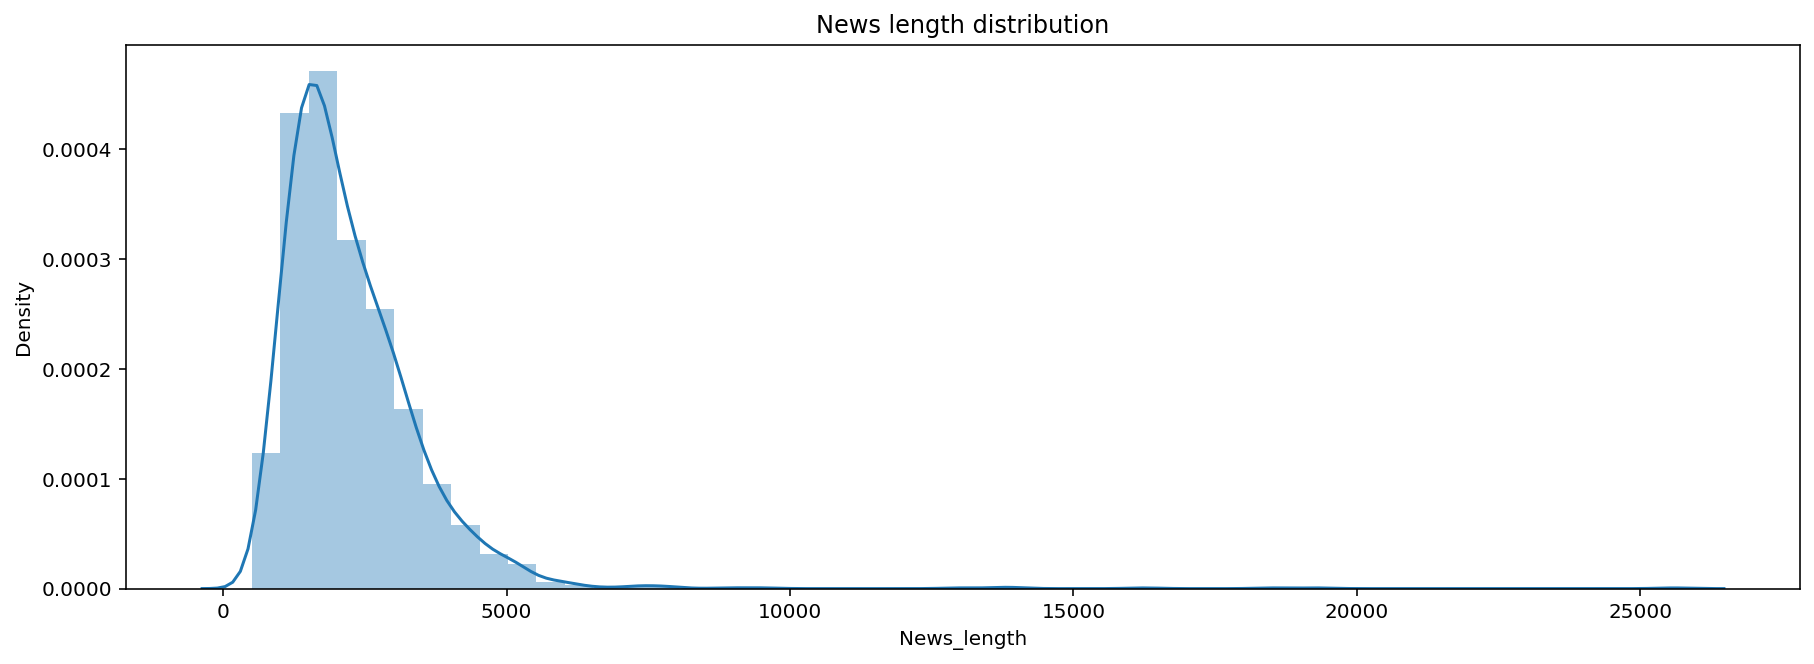

In [9]:
plt.figure(figsize=(15, 5))
sns.distplot(data['News_length']).set_title('News length distribution');

### Funtion to remove punctuation

In [10]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [11]:
data['news'] = data['news'].apply(remove_punctuation)
data.head(10)

,Unnamed: 0,news,type,News_length
0,0,Ad sales boost Time Warner profit\n \n Quarter...,business,2570
1,1,Dollar gains on Greenspan speech\n \n The doll...,business,2258
2,2,Yukos unit buyer faces loan claim\n \n The own...,business,1558
3,3,High fuel prices hit BAs profits\n \n British ...,business,2422
4,4,Pernod takeover talk lifts Domecq\n \n Shares ...,business,1576
5,5,Japan narrowly escapes recession\n \n Japans e...,business,1193
6,6,Jobs growth still slow in the US\n \n The US c...,business,1677
7,7,India calls for fair trade rules\n \n India wh...,business,1928
8,8,Ethiopias crop production up 24\n \n Ethiopia ...,business,1502
9,9,Court rejects 280bn tobacco case\n \n A US gov...,business,1455


### Removeing Stop Words From Data

In [12]:
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
sw = stopwords[:]

In [14]:
print("Number of stopwords: ", len(sw))

Number of stopwords:  179


In [15]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [16]:
data['news'] = data['news'].apply(stopwords)
data.head(10)

,Unnamed: 0,news,type,News_length
0,0,ad sales boost time warner profit quarterly pr...,business,2570
1,1,dollar gains greenspan speech dollar hit highe...,business,2258
2,2,yukos unit buyer faces loan claim owners embat...,business,1558
3,3,high fuel prices hit bas profits british airwa...,business,2422
4,4,pernod takeover talk lifts domecq shares uk dr...,business,1576
5,5,japan narrowly escapes recession japans econom...,business,1193
6,6,jobs growth still slow us us created fewer job...,business,1677
7,7,india calls fair trade rules india attends g7 ...,business,1928
8,8,ethiopias crop production 24 ethiopia produced...,business,1502
9,9,court rejects 280bn tobacco case us government...,business,1455


### Collect vocabulary count

In [17]:
# create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(data['news'])
# collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [18]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

<AxesSubplot:>

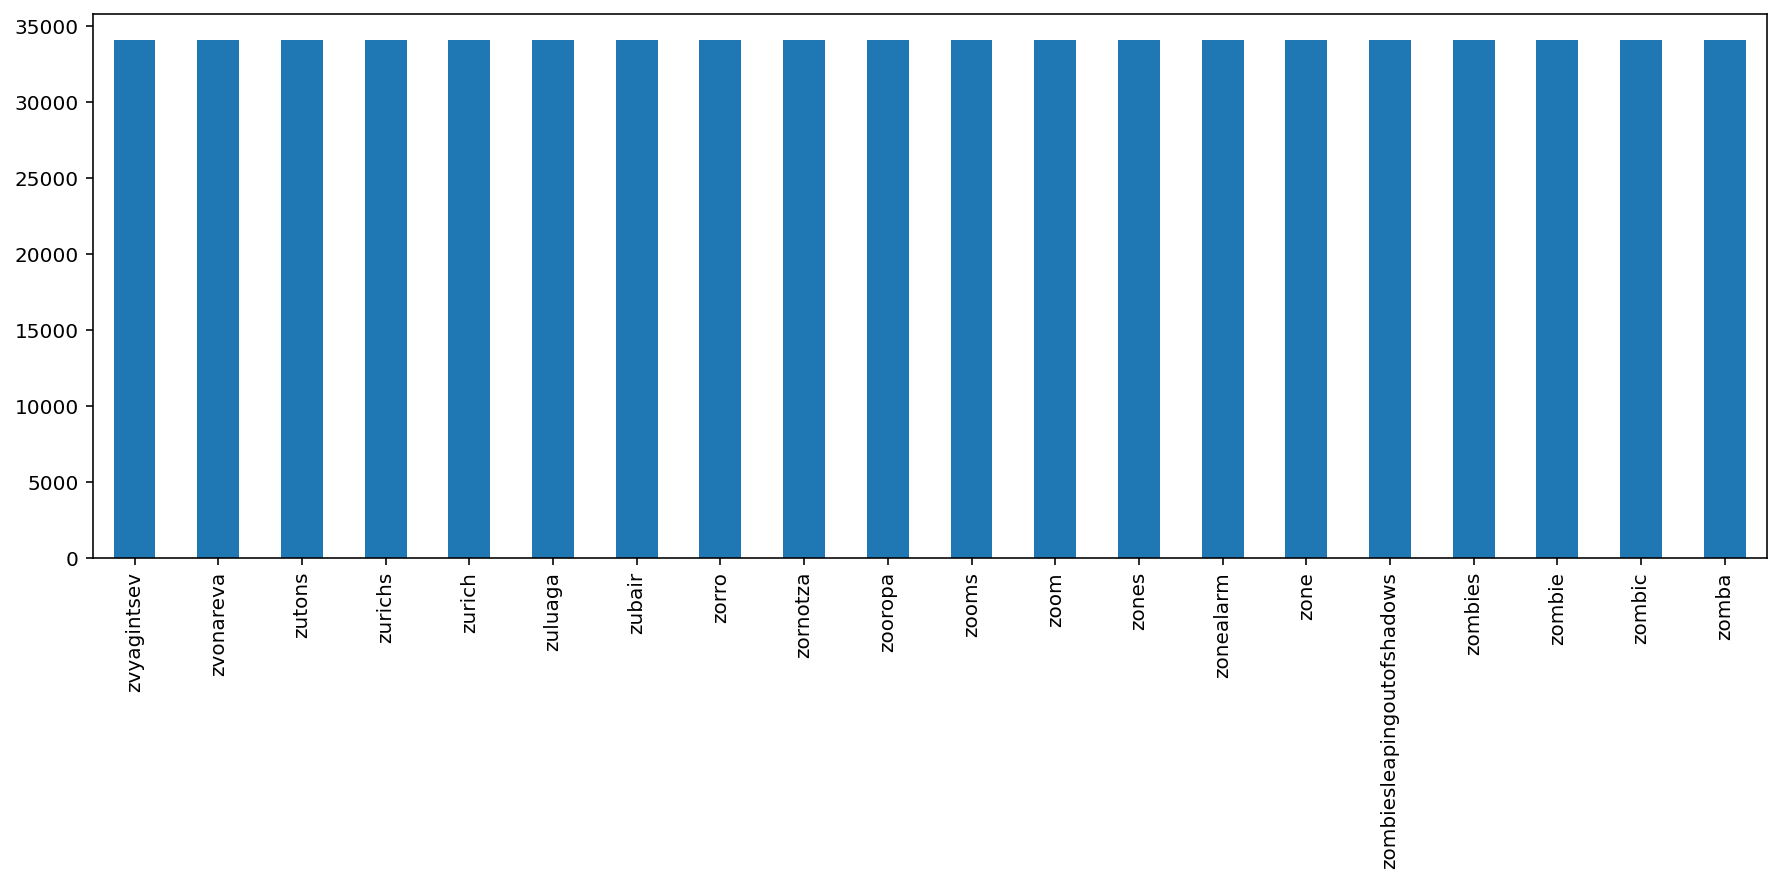

In [19]:
top_vacab = vocab_bef_stem.head(20)
top_vacab.plot(kind = 'bar', figsize=(15,5))

### Stemming 

In [20]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [21]:
data['news'] = data['news'].apply(stemming)
data.head(10)

,Unnamed: 0,news,type,News_length
0,0,ad sale boost time warner profit quarter profi...,business,2570
1,1,dollar gain greenspan speech dollar hit highes...,business,2258
2,2,yuko unit buyer face loan claim owner embattl ...,business,1558
3,3,high fuel price hit bas profit british airway ...,business,2422
4,4,pernod takeov talk lift domecq share uk drink ...,business,1576
5,5,japan narrowli escap recess japan economi teet...,business,1193
6,6,job growth still slow us us creat fewer job ex...,business,1677
7,7,india call fair trade rule india attend g7 mee...,business,1928
8,8,ethiopia crop product 24 ethiopia produc 1427 ...,business,1502
9,9,court reject 280bn tobacco case us govern clai...,business,1455


In [22]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer(stop_words = 'english')

# fit the vectorizer using the text data
tfid_vectorizer.fit(data['news'])

# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

<AxesSubplot:>

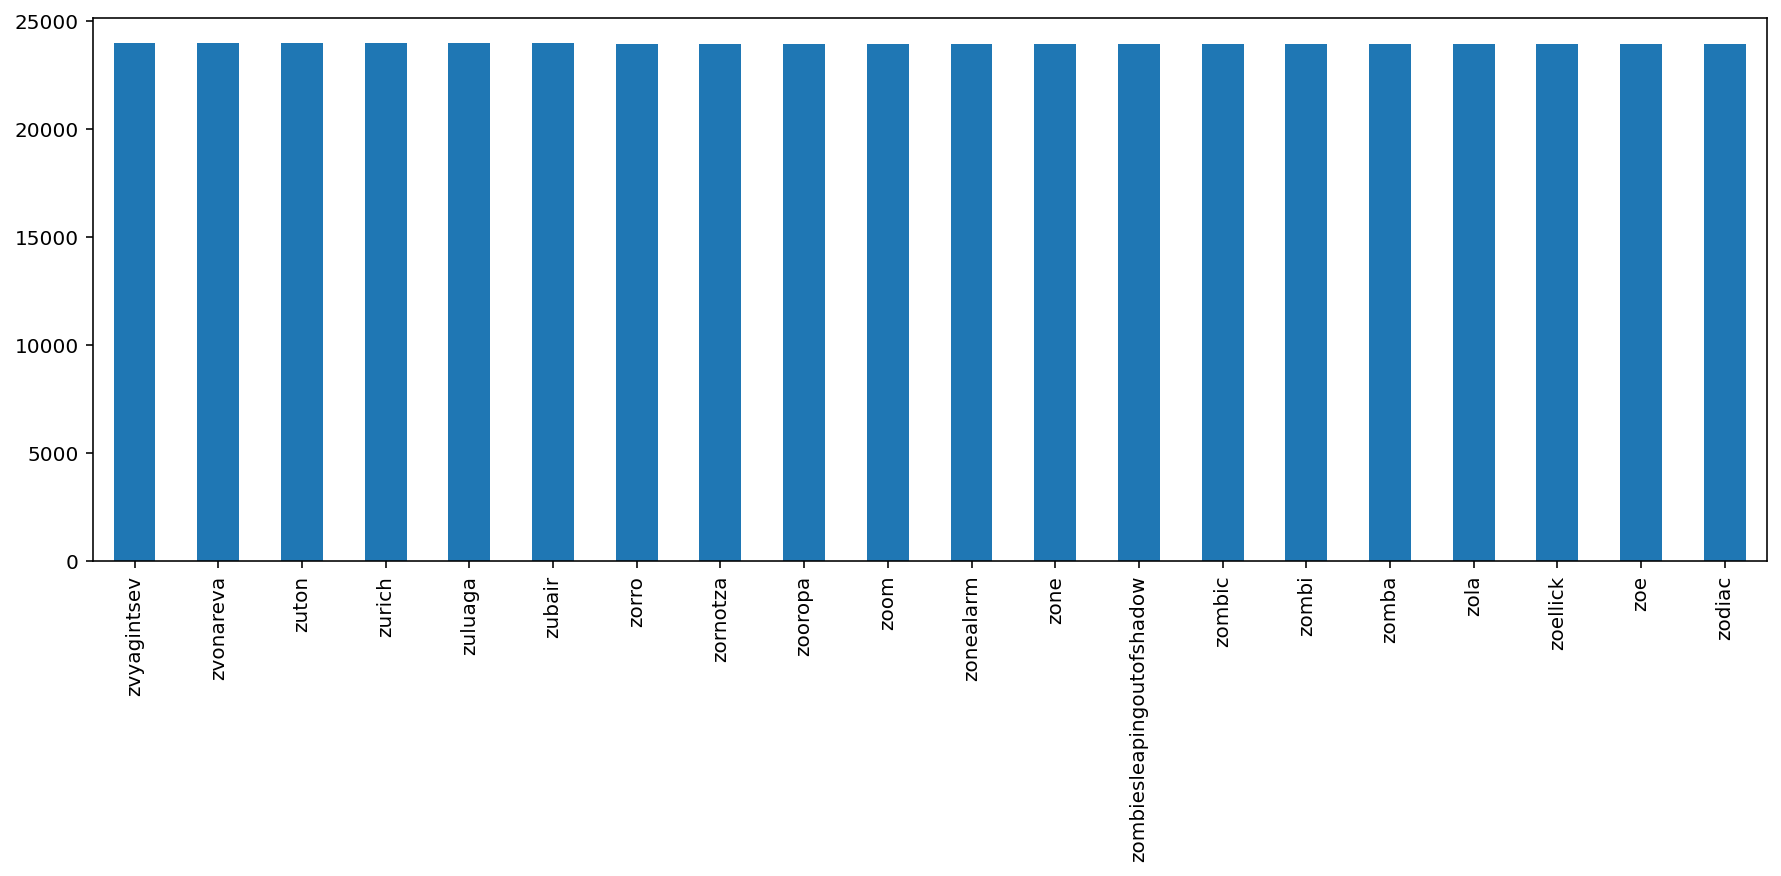

In [23]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)
# plot of the top vocab
top_vacab = vocab_after_stem.head(20)
top_vacab.plot(kind = 'bar', figsize=(15,5))

In [24]:
def length(text):    
    '''a function which returns the length of text'''
    return len(text)

In [25]:
data['length'] = data['news'].apply(length)
data.head(10)

,Unnamed: 0,news,type,News_length,length
0,0,ad sale boost time warner profit quarter profi...,business,2570,1627
1,1,dollar gain greenspan speech dollar hit highes...,business,2258,1458
2,2,yuko unit buyer face loan claim owner embattl ...,business,1558,1006
3,3,high fuel price hit bas profit british airway ...,business,2422,1631
4,4,pernod takeov talk lift domecq share uk drink ...,business,1576,1041
5,5,japan narrowli escap recess japan economi teet...,business,1193,751
6,6,job growth still slow us us creat fewer job ex...,business,1677,1054
7,7,india call fair trade rule india attend g7 mee...,business,1928,1206
8,8,ethiopia crop product 24 ethiopia produc 1427 ...,business,1502,1002
9,9,court reject 280bn tobacco case us govern clai...,business,1455,940


In [26]:
Business_data = data[data['type'] == 'business']
Entertainment_data = data[data['type'] == 'entertainment']
Politics_data = data[data['type'] == 'politics']
Sport_data = data[data['type'] == 'sport']
Tech_data = data[data['type'] == 'tech']

In [27]:
Business_data

,Unnamed: 0,news,type,News_length,length
0,0,ad sale boost time warner profit quarter profi...,business,2570,1627
1,1,dollar gain greenspan speech dollar hit highes...,business,2258,1458
2,2,yuko unit buyer face loan claim owner embattl ...,business,1558,1006
3,3,high fuel price hit bas profit british airway ...,business,2422,1631
4,4,pernod takeov talk lift domecq share uk drink ...,business,1576,1041
...,...,...,...,...,...
505,505,trial begin spain top banker trial emilio boti...,business,1632,1060
506,506,uk economi end year spurt uk economi grew esti...,business,2850,1780
507,507,healthsouth exboss goe trial former head us me...,business,1408,906
508,508,euro firm miss optim 90 larg compani around wo...,business,2631,1589


### Count of words in Business data

In [28]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer(stop_words = 'english')

# fit the vectorizer using the text data
tfid_vectorizer.fit(Business_data['news'])

# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

<AxesSubplot:>

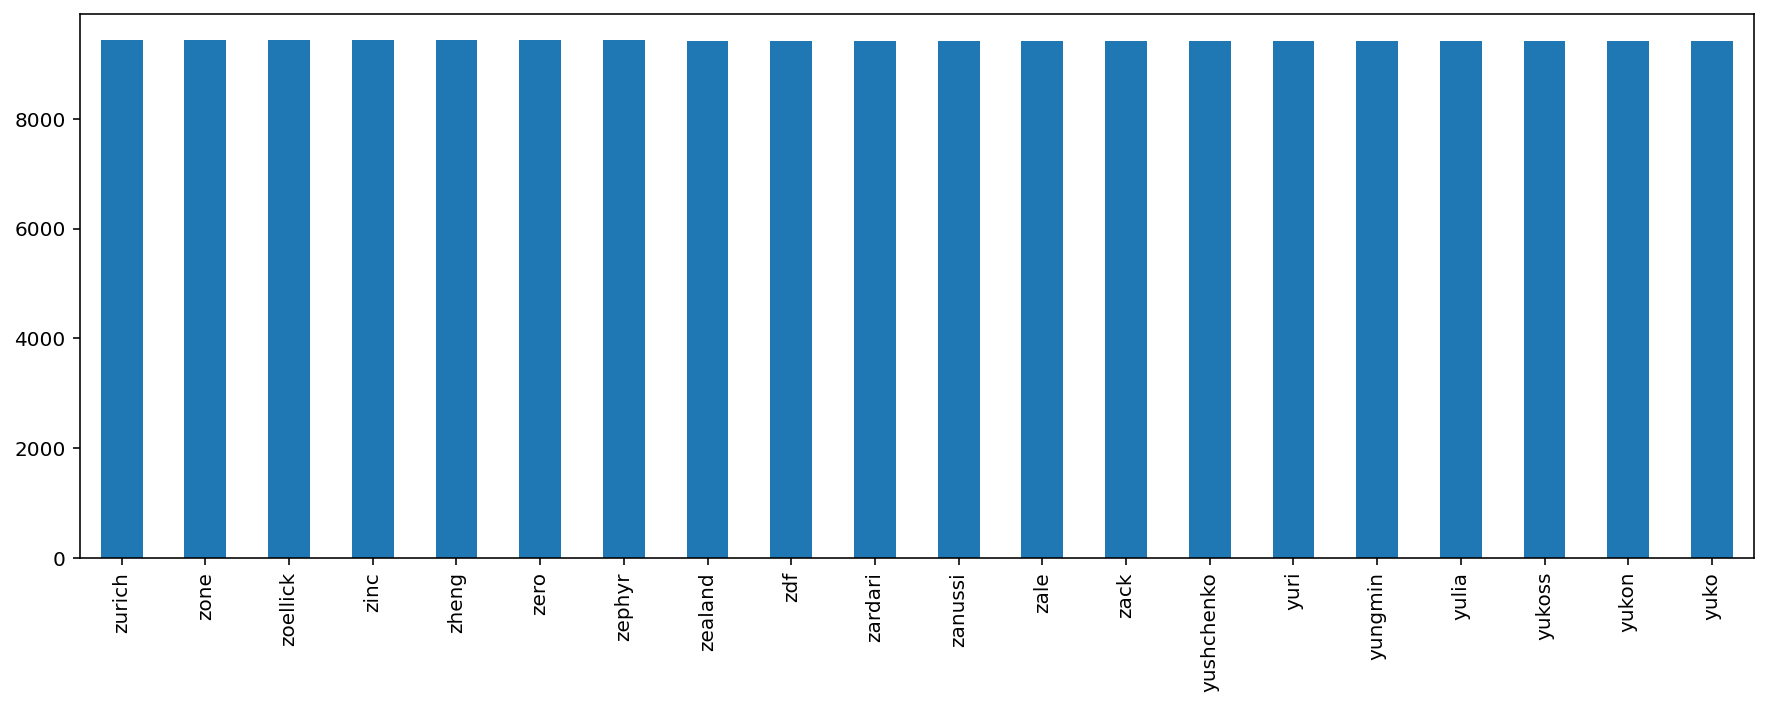

In [29]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)
# plot of the top vocab
top_vacab = vocab_after_stem.head(20)
top_vacab.plot(kind = 'bar', figsize=(15,5))

### Count of words in Entertainment data

In [30]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer(stop_words = 'english')

# fit the vectorizer using the text data
tfid_vectorizer.fit(Entertainment_data['news'])

# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

<AxesSubplot:>

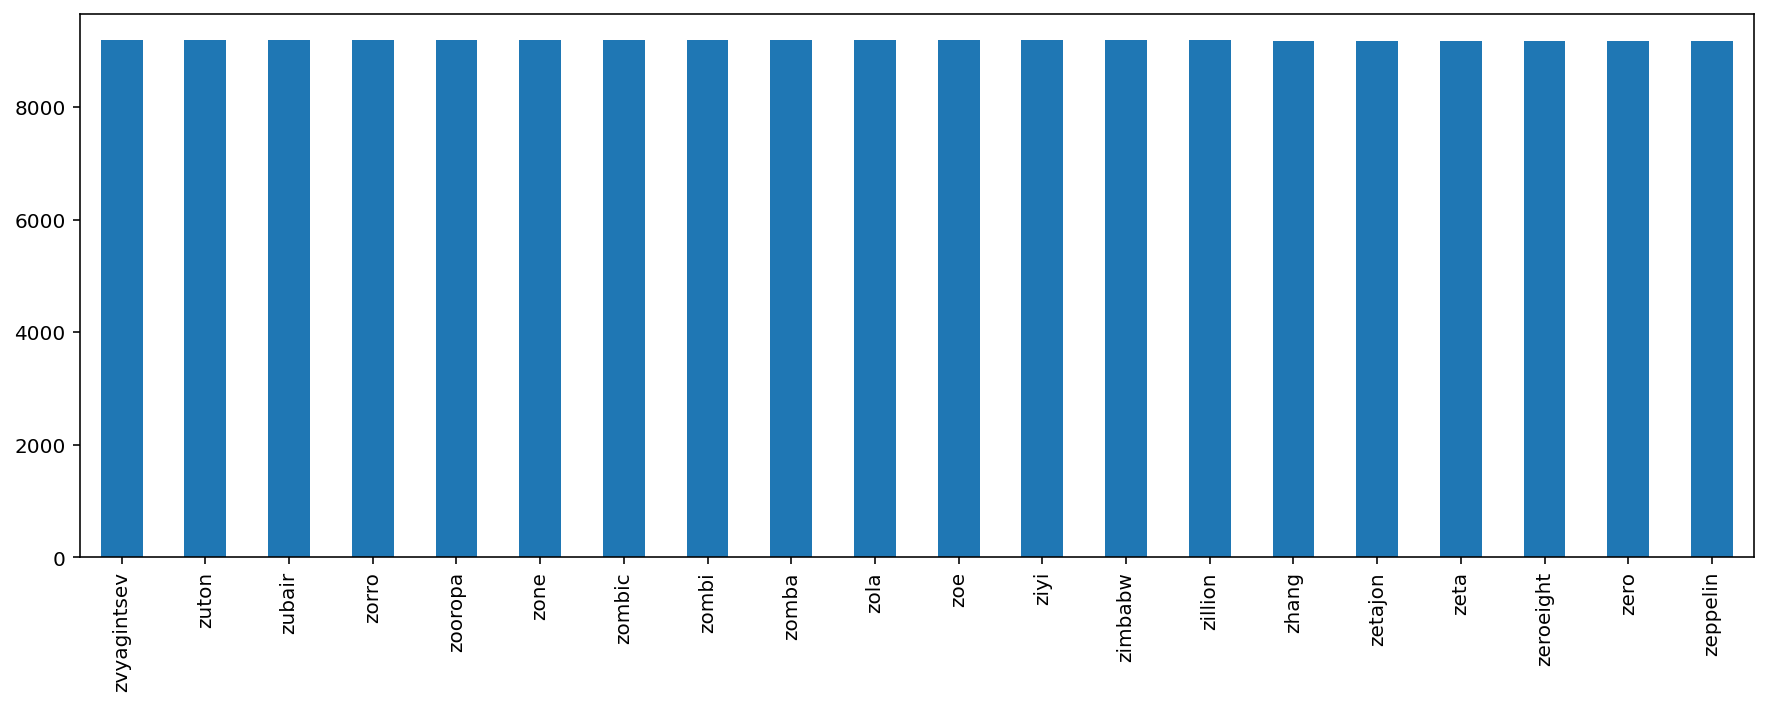

In [31]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)
# plot of the top vocab
top_vacab = vocab_after_stem.head(20)
top_vacab.plot(kind = 'bar', figsize=(15,5))

### Count of words in Politics data

In [32]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer(stop_words = 'english')

# fit the vectorizer using the text data
tfid_vectorizer.fit(Politics_data['news'])

# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

<AxesSubplot:>

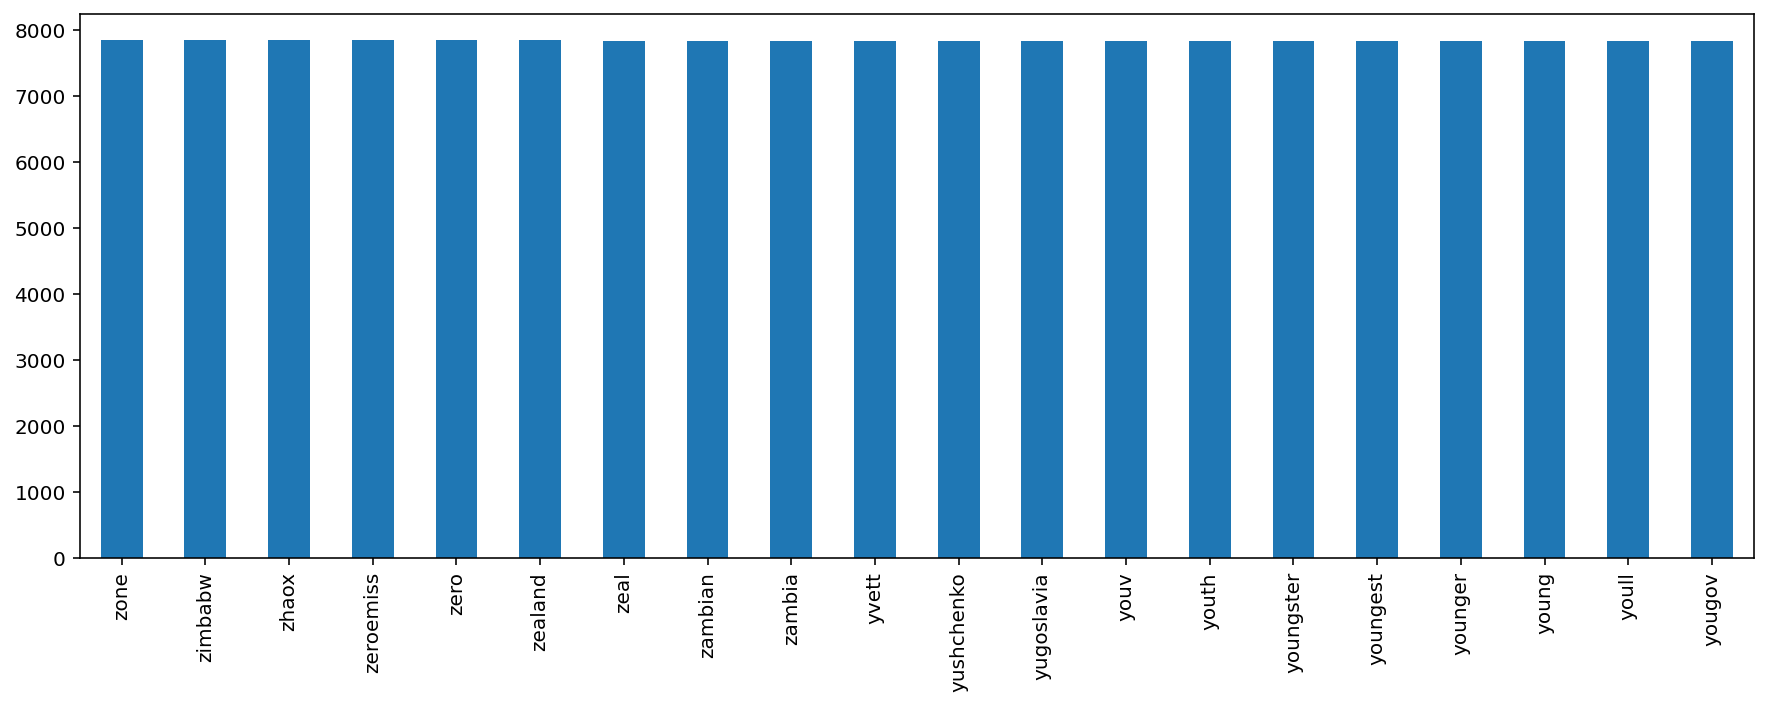

In [33]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)
# plot of the top vocab
top_vacab = vocab_after_stem.head(20)
top_vacab.plot(kind = 'bar', figsize=(15,5))

### Count of words in Sport data

In [34]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer(stop_words = 'english')

# fit the vectorizer using the text data
tfid_vectorizer.fit(Sport_data['news'])

# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

<AxesSubplot:>

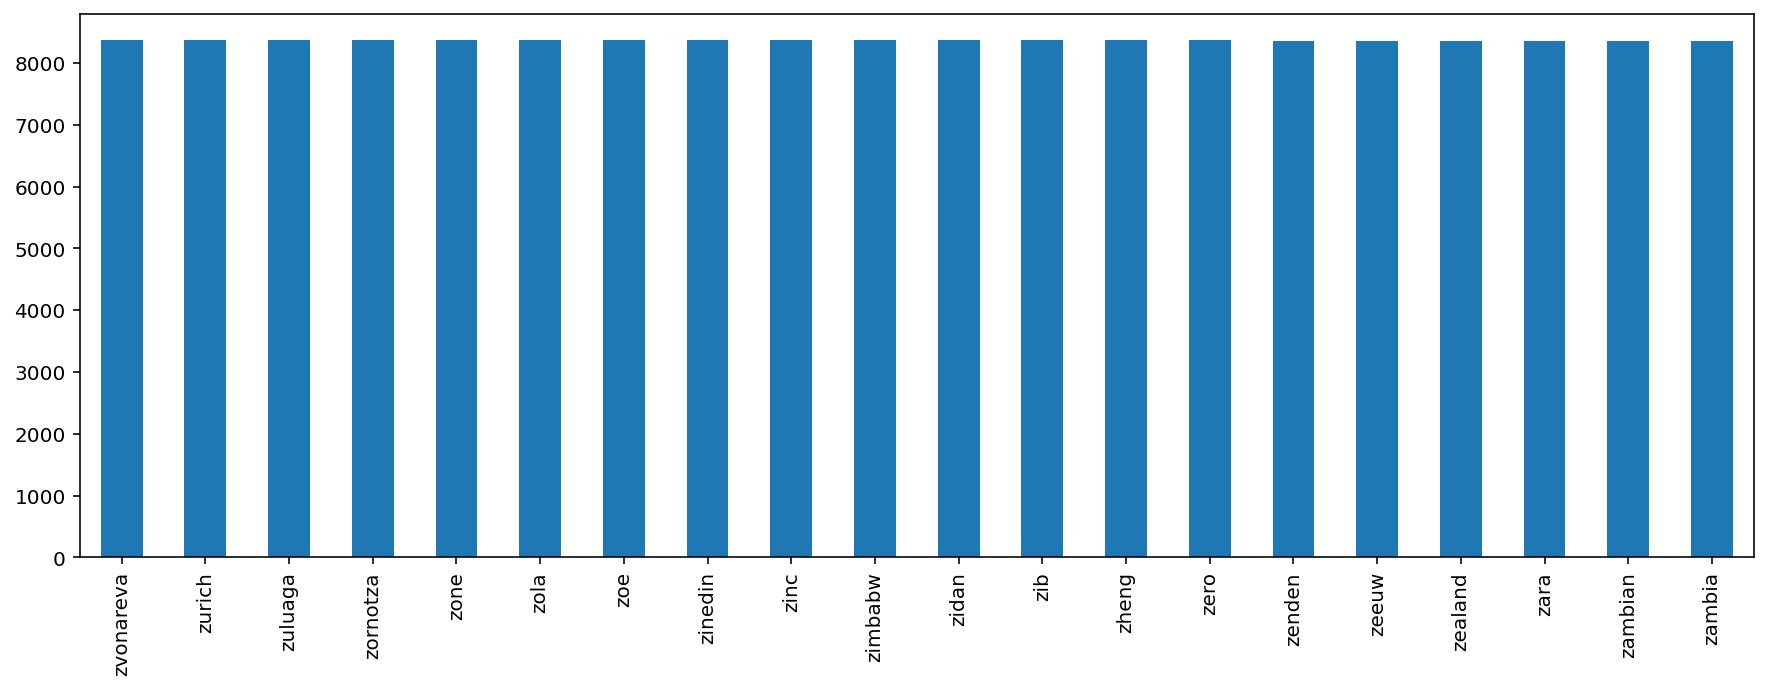

In [35]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)
# plot of the top vocab
top_vacab = vocab_after_stem.head(20)
top_vacab.plot(kind = 'bar', figsize=(15,5))

### Count of words in Tech data

In [36]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer(stop_words = 'english')

# fit the vectorizer using the text data
tfid_vectorizer.fit(Tech_data['news'])

# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

<AxesSubplot:>

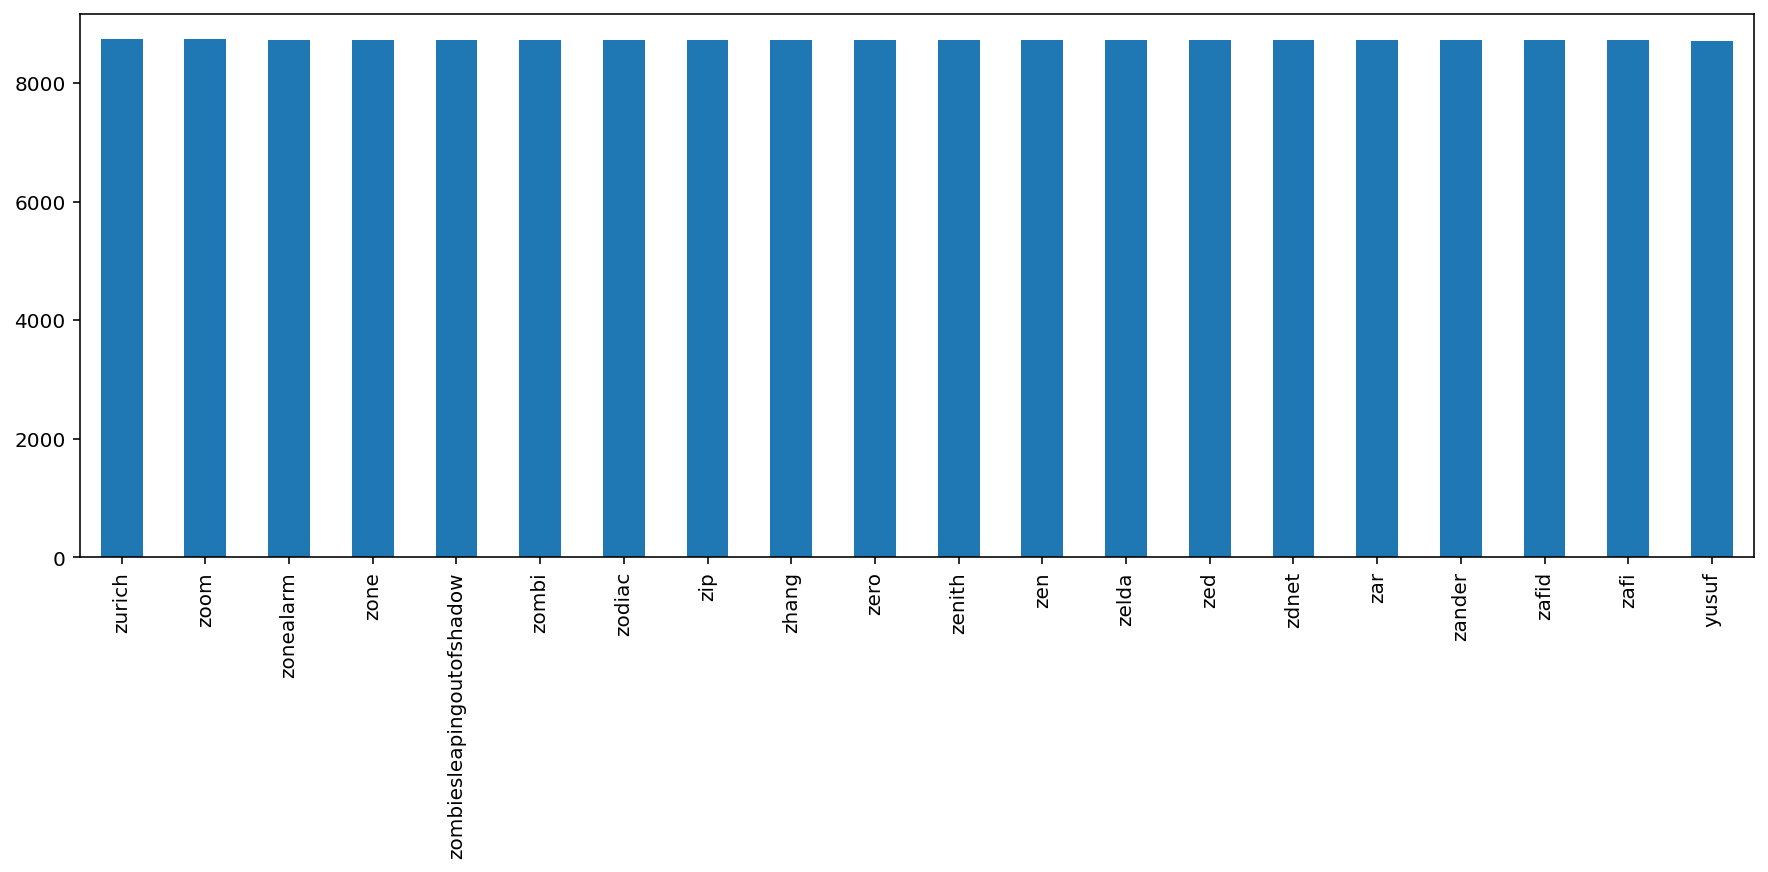

In [37]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)
# plot of the top vocab
top_vacab = vocab_after_stem.head(20)
top_vacab.plot(kind = 'bar', figsize=(15,5))

### Word Cloud

In [41]:
from wordcloud import WordCloud ,STOPWORDS

In [42]:
def create_wordcloud(words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

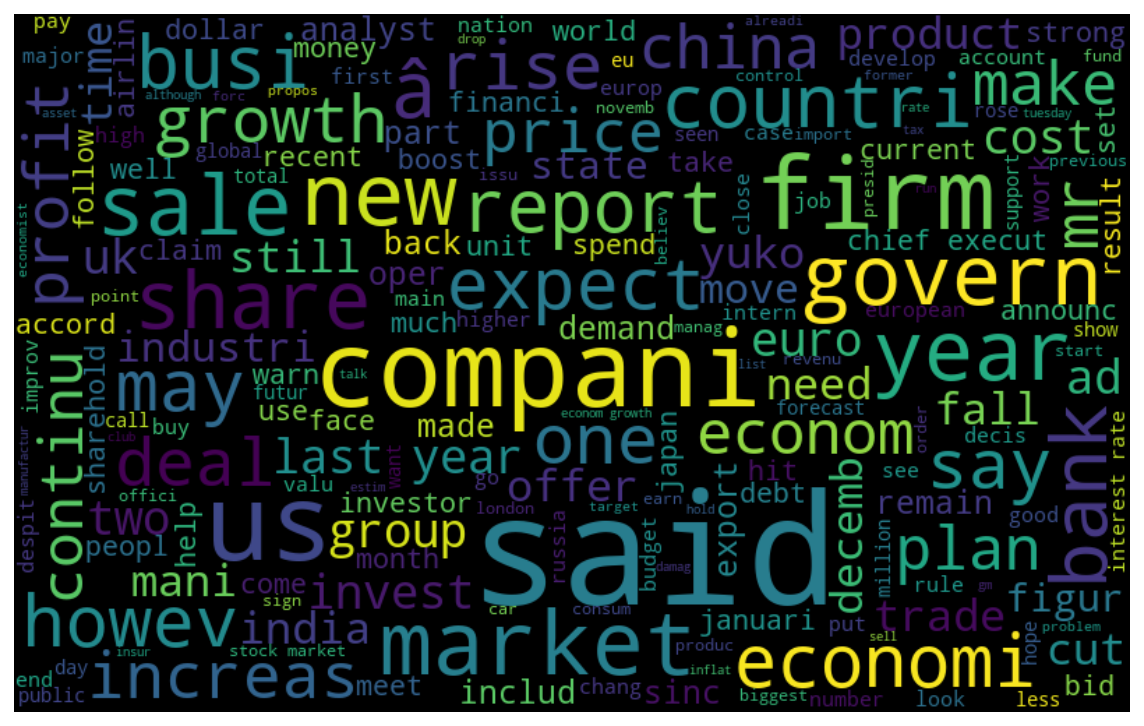

In [43]:
subset=data[data.type=="business"]
text=subset.news.values
words =" ".join(text)
create_wordcloud(words)

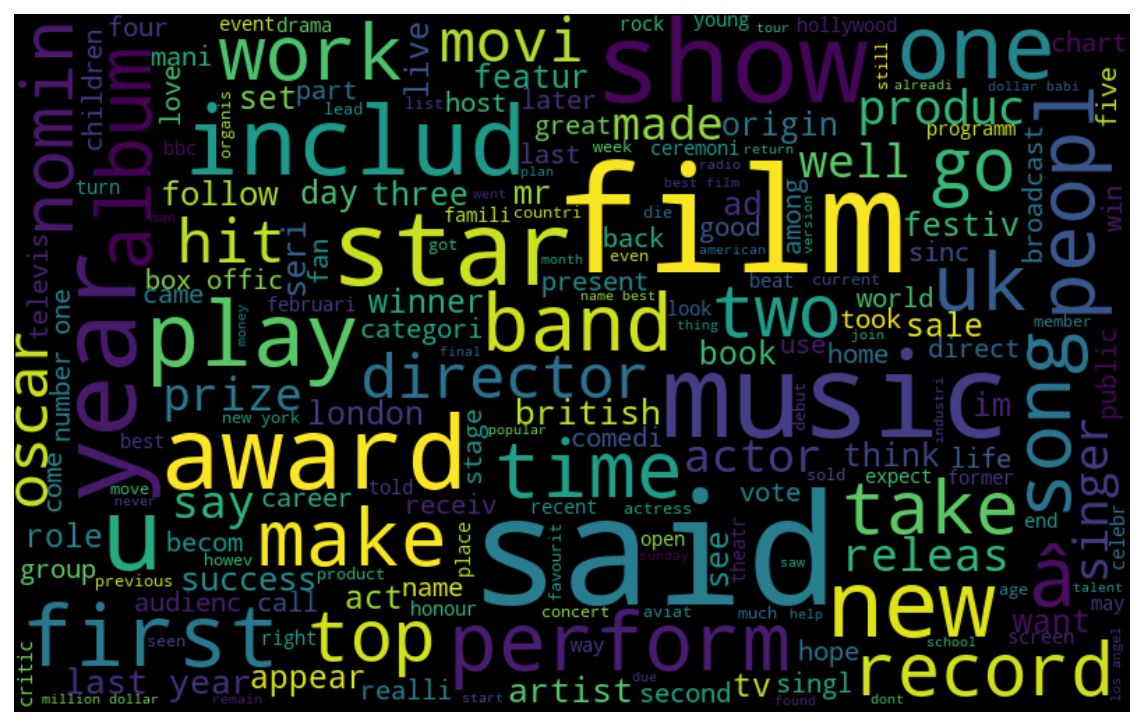

In [44]:
subset=data[data.type=="entertainment"]
text=subset.news.values
words =" ".join(text)
create_wordcloud(words)

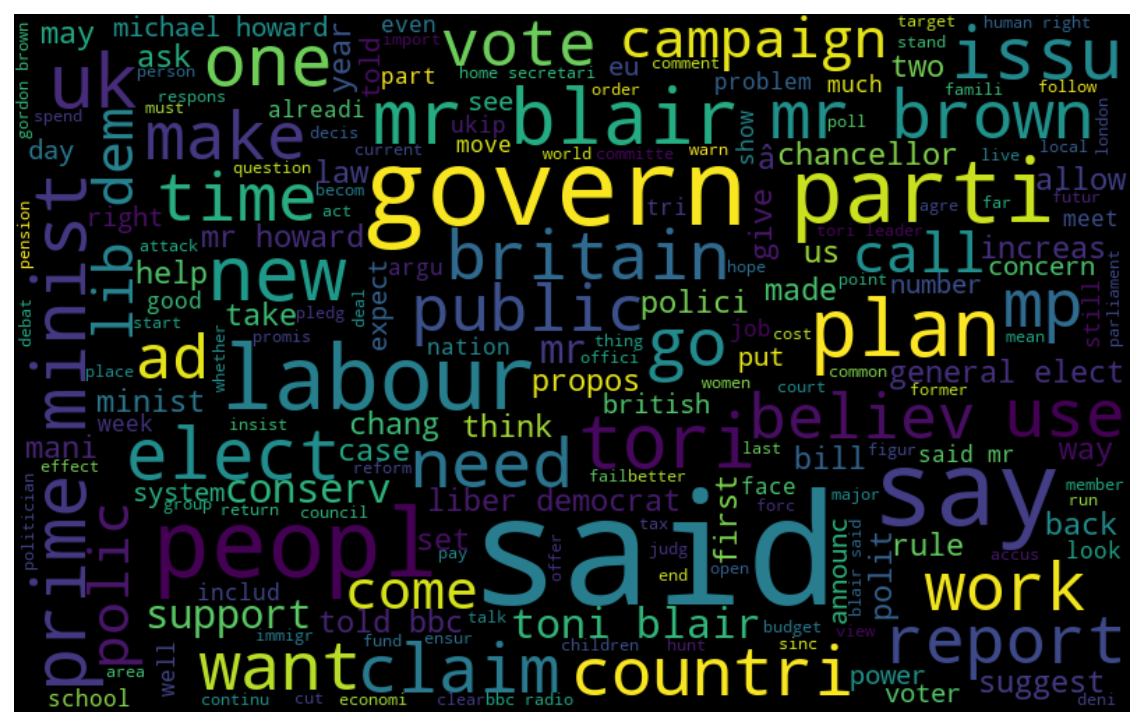

In [45]:
subset=data[data.type=="politics"]
text=subset.news.values
words =" ".join(text)
create_wordcloud(words)

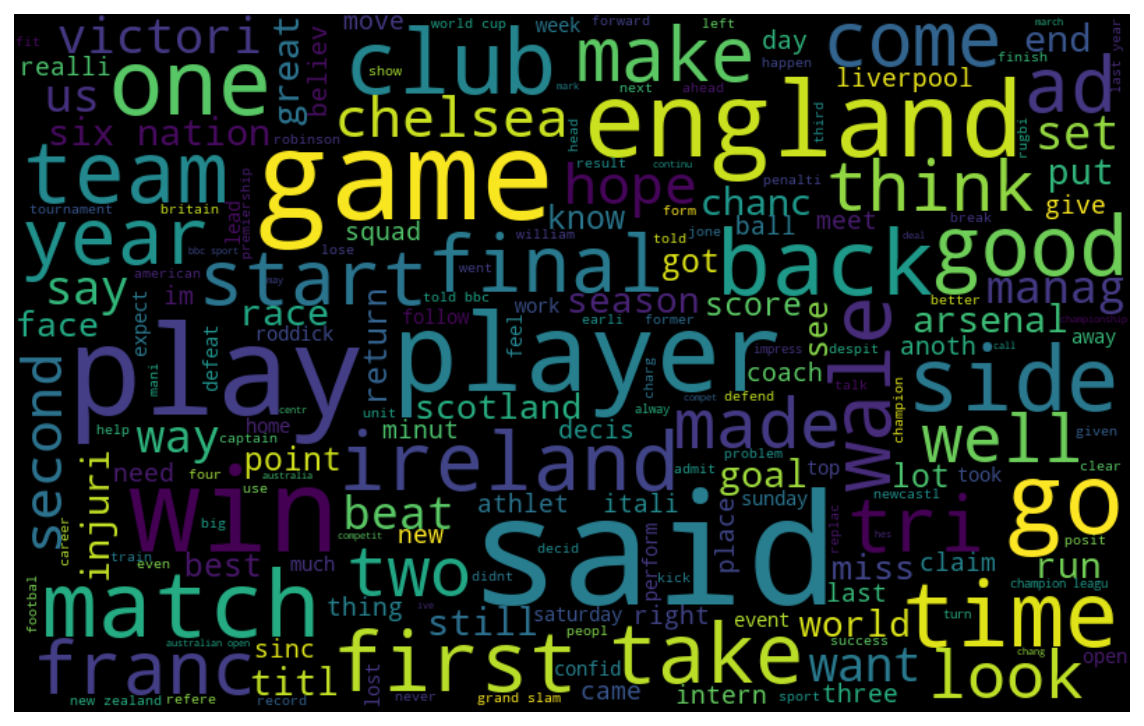

In [46]:
subset=data[data.type=="sport"]
text=subset.news.values
words =" ".join(text)
create_wordcloud(words)

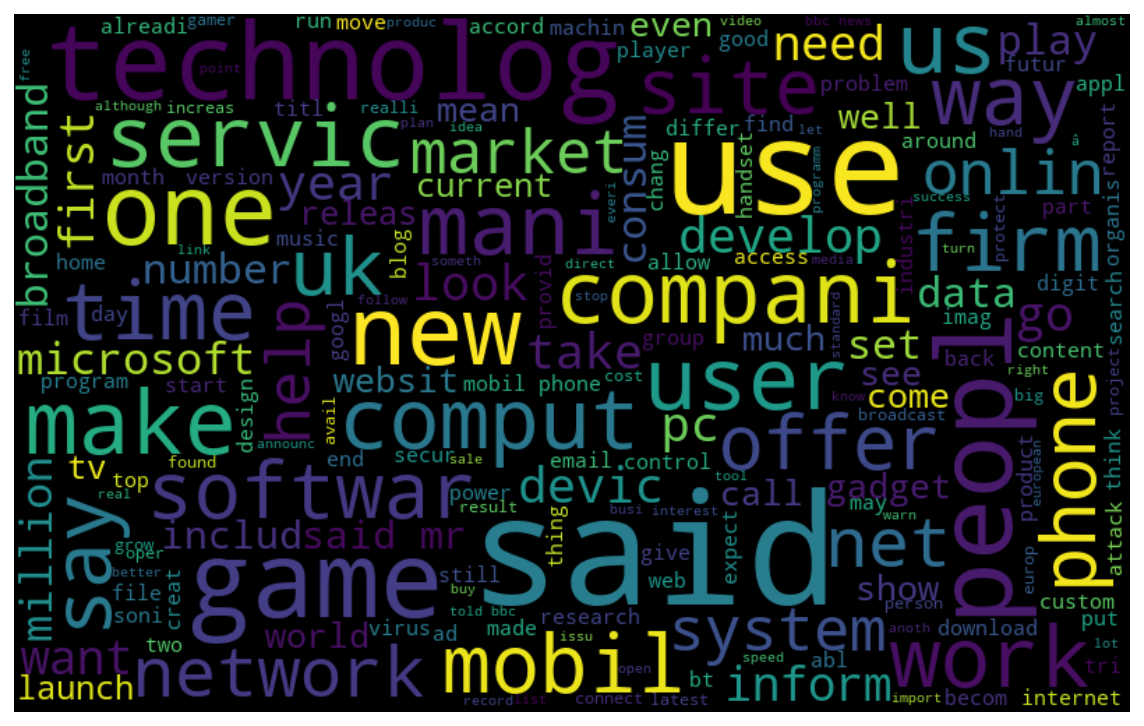

In [47]:
subset=data[data.type=="tech"]
text=subset.news.values
words =" ".join(text)
create_wordcloud(words)